## Integración Númerica

La idea de integración Númerica es aproximar la integral indefinida $$ I=\int_a^bf(x)dx$$
por medio de una suma ponderada $$ \int_a^bf(x)dx \approx\sum_{k=0}^N c_kf(x_k)$$ aqui las $x_0< x_1<\ldots<x_N \in [a,b]$ y los $c_k$  se escogen adecuadamente.
 ![imagen.png](attachment:imagen.png)

* $$h=\frac{b-a}{N}$$

* $$x_k=a+kh\quad k=0,1,\cdots,N$$

* $$L=h\sum_{k=0}^{N-1} f(x_k)=h\sum_{k=0}^{N-1} f(a+kh)$$

* $$R=h\sum_{k=1}^{N} f(x_k)=h\sum_{k=1}^{N} f(a+kh)$$




Vamos aproximar $$I=\int_a^b f(x)dx$$
por medio de la suma ponderada de valores de $f$,
$$\int_a^b f(x)dx\approx \sum_{k=1}^{N}c_k f(x_k) \quad (1)$$

Donde las $c_k$ y las $x_k$ para $k=1,2,\cdots,N$ , se seleccionan de manera adecuada 

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from google.colab import files 
from IPython.display import Image

In [ ]:
image1_path ="/content/drive/My Drive/Numerico2020II/Imagenes/formcompT.jpg" 

Los Metodos que vamos a ver se basan en aproximar el integrando $f$ por un polinomio $p$ de grado alo mas $n$ tal que  $f(x_k)=p(x_k) \in x_0,x_1,\ldots,x_N$
e integrar el polinomio exactamente $$\int_a^b f(x)dx\approx \int_a^b p(x)dx$$  
al lado derecho de (1) se le llama fórmula de cuadratura.

Los polinomios mas importantes que se usan en métodos de integración son los polinmoios que coinciden con la función en los nodos y se llaman polinomios de interpolación 
La siguiente definición nos ayudará a derivar fórmulas de cuadratura.

**Def**: La fórmula de cuadratura en la expresión (1) tiene grado de presición $m$ si es exacta para polinomios de grado alo mas $m$. Pero no es exacta para $x^{m+1}$.

 

Ejemplo1:  Encuentre una regla de cuadratura en los nodos $x_0=0,x_1=1,x_2=2$  para aproximar $\int_0^3 f(x)dx$. Use el resultado para estimar $\int_0^3x^3dx$.

Como se usaran 3 nodos espramos una precisión de 2. Queremos: $$ I=\int_0^3f(x)dx\approx c_0f(0)+c_1f(1)+c_2f(2)$$ para $f(x)=1,x,x^2$ esto es suficiente ya que si tenemos un polinomio $p(x)=\alpha+\beta x+\gamma x^2$ la fórmula también será exacta para este polinomio por linealidad de la integral.
$$ \int_0^3(\alpha+\beta x+\gamma x^2)dx=\int_0^3\alpha dx+\int_0^3\beta x dx+\int_0^3\gamma x^2dx$$



 $x_0=0,x_1=1,x_2=2$



Ahora  usando esta condiciones tenemos :

$$c_0+c_1+c_2=3 \quad c_1+2c_2=\frac{9}{2}\quad c_1+4c_2=9$$

$$c_0=\frac{3}{4}\quad c_1=0,\quad c_2=\frac{9}{4}$$

La fórmula requerida es:
$$\int_0^3 f(x)dx\approx \frac{3f(0)+0f(1)+9f(2)}{4}$$

 con $f(x)=x^3$ tenemos $$) la integral exacta nos da $\frac{3^4}{4}=\frac{81}{4}$

Explicaremos tres formulas de  cuadratura:
.La regla del punto medio:
$$\int_a^bf(x)dx \approx(b-a)f(\frac{a+b}{2})$$ 



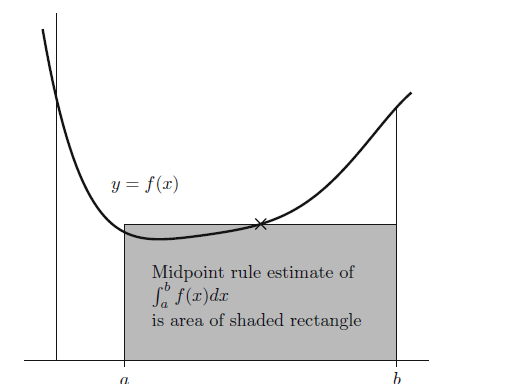

La regla del Trapecio:
$$\int_a^bf(x)dx \approx\frac{a-b}{2}[f(a)+f(b)] $$ 



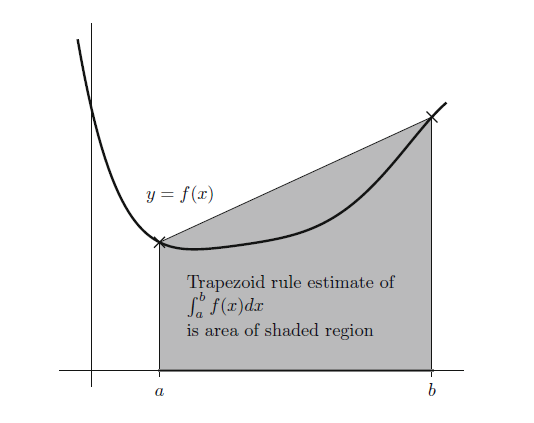

La regla de Simpson:
    $$\int_a^bf(x)dx \approx\frac{a-b}{6}[f(a)+4f(\frac{a+b}{2})+f(b)$$ 
    

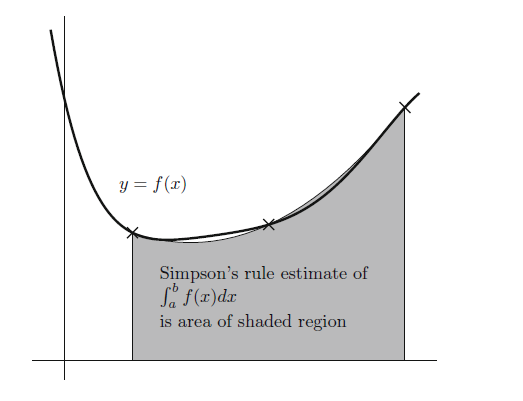

### *Ejemplo* 
Estime la siguiente fórmula usando las 3 reglas vistas en 


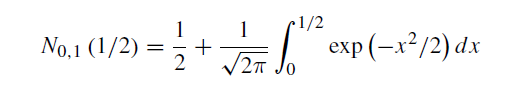

In [ ]:
def exp1(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(x**2)/2)

z=exp1(1/4)*1/2+1/2
print(z)

0.6933340584014246


In [ ]:
w=1/2+exp1(1/4)*1/2
w

0.6933340584014246

In [ ]:
import numpy as np
x=np.exp(-((1/4)**2)/2)
x1=1/(np.sqrt(2*np.pi))*x*1/2
y=1/2+x1
 
print(y)

0.6933340584014246


In [ ]:
N01=1/2+1/4*(exp1(0)+exp1(1/2))
print(N01)

0.6877519017914331


In [ ]:
Ext=0.6914625
Et=Ext-0.6877519017914331
Et

0.0037105982085668954

In [ ]:
Tc=0.69053
ETc=Ext-Tc
ETc

0.0009325000000000028

In [ ]:
N0S=1/2+1/12*(exp1(0)+4*exp1(1/4)+exp1(1/2))
N0S

0.6914733395314274

$$\int_a^b f(x)dx-(b-a)f(\frac{a+b}{2})=\frac{(b-a)h^2}{24}f^{''}(\xi_M)$$





-

$$\int_a^b f(x)dx-\frac{b-a}{2}[f(a)+f(b)]=-\frac{(b-a)h^2}{12}f^{''}(\xi_T)$$



-

$$
\int_a^b f(x)dx-\frac{h}{3}[f(a)+4f(a+h)+f(b)]=-\frac{(b-a)h^4}{180}f^{(4)}(\xi_S)
\quad (Es)
$$

Donde $h=\frac{(b-a)}{2}$, los puntos $\xi_M,\xi_T,\xi_S$ son puntos en el intervalo $(a,b)$

In [ ]:
import numpy as np
def trapsum(fcn,a,b,N):
  '''
  función para aproximar la integral con la regla del trapecio
  '''
  h=(b-a)/N
  s=(fcn(a)+fcn(b))/2
  for k in range(1,N):
    s+=fcn(a+k*h)
  return s*h

In [ ]:
def trapsum(fcn,a,b,N):
  '''
  TrapV
  '''
  h=(b-a)/N
  x=a+np.arange(1,N)*h
  return h*((fcn(a)+fcn(b))/2+sum(fcn(x)))


### Fórmula compuesta 
$$\int_a^b f(x)dx=\int_a^c f(x)dx+\int_c^b f(x)dx$$ 
$c\in (a,b)$
 

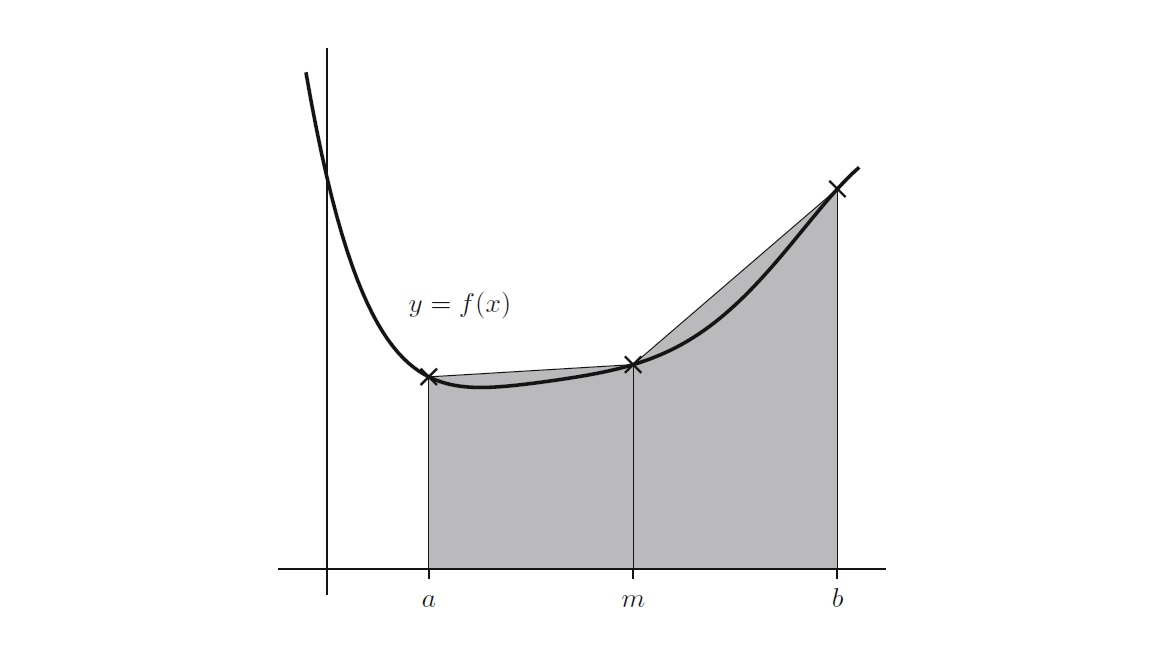

In [ ]:
display(Image(image1_path))

En el ejemplo $c=\frac{1}{4}$

$$
 \begin{eqnarray}
 N_{0,1}(\frac{1}{2})&\approx & \frac{1}{2}+\frac{1}{\sqrt(2\pi)}\frac{\frac{1}{4}}{2}[\exp(0)+\exp(-(\frac{1}{4})^2/2)]&\\
&  &+\frac{1}{\sqrt(2\pi)}\frac{\frac{1}{4}}{2}[\exp(-(\frac{1}{4})^2/2)+\exp(-(\frac{1}{2})^2/2)]=0.69053
\end{eqnarray}$$
Reduciendo el error a $0.0009$,note que reduciendo el paso $h$ a la mitad el error se reduce a algo como la cuarta parte del error anterios  esto está relacionado con con la expresión para el error en la fórmula ($*$) 

$$
\begin{eqnarray}
\int_a^b f(x)dx &\approx & \frac{h}{2}[f(a)+f(a+h)]+\frac{h}{2}[f(a+h)+f(b) ] & \\& =&  \frac{h}{2}[f(a)+2f(a+h)+f(b)]
\end{eqnarray}
\quad (**)
$$
ahora $h=\frac{(b-a)}{2}$, La ecuación (**) es exactamente el promedio de la suma  izquierda de Rieman $h[f(a)+f(a+h)]$ y la suma derecha $h[f(a+h)+f(b)]$

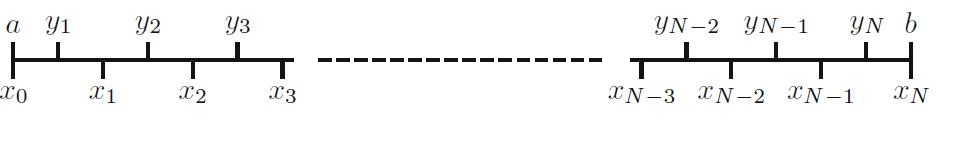

In [ ]:
image2_path ="/content/drive/My Drive/Numerico2020II/Imagenes/NodosT.jpg"
display(Image(image2_path))

### La fórmula compuesta de la regla del trapecio $T_N$
Si tomamos $N$ subdivisiones del intervalo original,tomando $h=\frac{(b-a)}{N}$ las sumas derchas e izquierdas estan dadas por las ecuaciones ()() promediandolas obtenemos:
$$
\begin{eqnarray}
\int_a^bf(x)dx &\approx & T_N=\frac{1}{2}(L_N+R_N)&\\&
=& \frac{1}{2}[h\sum_{k=0}^{N-1}f(a+kh)+h\sum_{k=1}^{N}f(a+kh)]&\\&
=& \frac{h}{2}[f(a)+2\sum_{k=1}^{N-1}f(a+kh)+f(b)]
\end{eqnarray}
\quad (3)
$$  

In [ ]:
import numpy as np
def tarapN(fcn,a,b,N):
  '''
Función que aproxima la integral de la función 'fcn'
sobre el intervalo [a,b] en N segmentos usando la regla del Trapecio .
  '''
  h=(b-a)/N
  s=(fcn(a)+fcn(b))/2
  for k in range(1,N):
    s+=fcn(a+k*h)
  return s*h

-

Se puede evitar el for usando el comando **sum** de python

In [ ]:
def trapN(fcn,a,b,N):
  '''
Función que aproxima la integral de la función 'fcn'
sobre el intervalo [a,b] en N segmentos usando la regla del Trapecio .
  '''
  h=(b-a)/N
  x=a+np.arange(1,N)*h
  return h*((fcn(a)+fcn(b))/2+sum(fcn(x)))

$$
E(T_N)=\int_a^b f(x)dx-T_N=c(b-a)h^kf^{''}(\xi)
$$

In [ ]:
for k in range (1,8):
  N=2**k
  I=trapN(lambda x:x**2,0,3,N)
  print(N,9-I)

2 -1.125
4 -0.28125
8 -0.0703125
16 -0.017578125
32 -0.00439453125
64 -0.0010986328125
128 -0.000274658203125


Tarea 20/10/20 Hacer una tabla con con los valores de las aproximaciones de la integral de la funcion $seno (\frac{\pi}{2}x)$ en el intervalo $[0,4]$ los valores de $N$, las aproximaciones , los errores y errores relativos de $N$

In [ ]:
image2_path ="/content/drive/My Drive/Numerico2020II/Imagenes/NodosT.jpg"
display(Image(image2_path))

NameError: ignored

La regla del punto medio compuesta usa los puntos medios de cada sub división Es decir si $x_k=a+kh$ son los punto de la regla del trapecio, usando las mismas $N$ subdivisiones tendremos $y_k=(x_k+x_{k+1})/2=a+(k-\frac{1}{2})h $  para $k=1,2,\cdots,N$

&nbsp;
$$
\int_a^b f(x)dx\approx M_n=h\sum_{k=1}^{N}f(y_k)=h\sum_{k=1}^{N}f(a+(k-\frac{1}{2})h)  \quad (4)
 $$
&nbsp; 

La regla de simpson compuesta usando $h=(b-a)/2N$ toma todos los puntos de la regla compuesta del punto medio (4) y del trapecio (3)

&nbsp; 
$$M_n=2h\sum_{k=1}^{N}f(y_k)=2h\sum_{k=1}^{N}f(a+(2k-1)h)$$

&nbsp;
$$
 T_N
= h[f(a)+2\sum_{k=1}^{N-1}f(x_k)+f(b)]=h[f(a)+2\sum_{k=1}^{N-1}f(a+2kh)+f(b)]
$$ 
&nbsp;



Aplicando la regla de *Simpson* a cada subintervalo $[x_{k-1}-x_k]$
&nbsp;
$$
S_{2N}=\frac{h}{3}[f(a)+4\sum_{k=1}^Nf(y_k)+2\sum_{k=1}^{N-1}f(x_k)+f(b)]=\frac{T_N+2M_N}{3} \quad (5)
$$

&nbsp;

$$\int_{x_{k-1}}^{x_k}f(x)dx \approx\frac{x_{k-1}-x_k}{6}[f(x_{k-1})+4f(\frac{x_{k-1}+x_k}{2})+f(x_k)$$

In [ ]:
import numpy as np
def MN(fcn,a,b,N):
  '''
Función que aproxima la integral de la función 'fcn'
sobre el intervalo [a,b] en N segmentos usando la regla del Trapecio .
  '''
  h=(b-a)/N
  s=0
  for k in range(1,N):
    s+=fcn(a+(k-1/2)*h)
  return s*h

In [ ]:
import numpy as np
def simpsum(fcn,a,b,N):
  '''Funcion que aproxima la integral de 'fcn' sobre el intervalo [a,b]
     en N segmentos usando la regla de Simpson
  '''
  h=(b-a)/N
  s=(fcn(a)+fcn(b))
  for k in range(1,N,2):
    s+=4*fcn(a+k*h)
  for k in range(2,N-1,2):
    s+=2*fcn(a+k*h)
  return s*h/3


In [ ]:
for k in range (1,5):
  N=2**k
  I=trapN(lambda x:1/(x+2),-1,1,N)
  print(N,I)

2 1.1666666666666665
4 1.1166666666666665
8 1.1032106782106783
16 1.0997677015630307


In [ ]:
for k in range (1,5):
  N=2**k
  I=simpsum(lambda x:1/(x+2),-1,1,N)
  print(N,I)

2 1.111111111111111
4 1.0999999999999999
8 1.0987253487253488
16 1.0986200426804815


In [ ]:
for k in range (1,5):
  N=2**k
  I=MN(lambda x:1/(x+2),-1,1,N)
  print(N,I)

2 0.6666666666666666
4 0.9079365079365079
8 1.0093682031762528
16 1.0554821372845258


*Ejemplo* Use las reglas de punto Medio , Trapecio y Simpson compuestas para estimar
$$
\int_{-1}^1\frac{dx}{x+2}
$$
&nbsp;
Usando $N=1,2,4,8,16$ subdivisiones , El valor exacto $I=ln(3)\approx 1.09861$,
Use las funciones simpsum,trapN y construya una similar para la regla del punto medio para construir la siguiente Tabla 

In [ ]:
image3_path ="/content/drive/My Drive/Numerico2020II/Imagenes/Tablaej181020.jpg"
display(Image(image3_path))



**Teorema** Suponga que la integral $I=\int_a^b f(x)dx$ es estimada por medio de 
la regla de Simpson $S_N$ usando $N$ subdivisiones de $[a,b]$, ademas suponga
que $f^{(4)}$ es continua.Entonces el errror cometido es:
&nbsp;

$$
I-S_n=-\frac{(b-a)h^4}{180}f^{(4)}(\xi)
$$
&nbsp;

donde $h=(b-a)/N$, y algún $\xi \in (a,b)$


$$
\int_{xk}^{x_{k+1}}f(x)dx-\frac{h}{3}[f(x_k)+4f(x_k+h)+f(x_{k+1})=-
\frac{(x_{k+1}-x_k)}h^{4}{180}f^{(4)}(\xi_k)
$$

&nbsp;
para algún 
 $\xi_k \in (x_k,x_{k+1})$

Como $x_{k+1}-x_k=2$, entonces el error total es:
&nbsp;

$$
E(S_n)=-\frac{2h^5}{180}\sum_{k=0}^{M-1}f^{(4)}(\xi_k)
$$
&nbsp;


Como $f^{(4)}$ es continua , por el teorema del valor intermedio debe de existir
$\xi \in (a,b)$ tal que :

&nbsp;
$$
Mf^{(4)}(\xi)=\sum_{k=0}^{M-1}f^{(4)}(\xi_k)
$$

&nbsp;
Podemos reescribir

&nbsp;
$$
E(S_N)=-\frac{2Mh^5}{180}f^{(4)}(\xi)
$$




Finalmente $2Mh=Nh=(b-a)$  así

&nbsp;

$$
E(S_N)=-\frac{(b-a)h^4}{180}f^{(4)}(\xi)
$$

$QED$

[pi-hole](https://geekland.eu/instalar-configurar-pi-hole-raspberry-pi/ "Explicación de como instalar Pi-hole") es una opción interesante.

### Funciones de Python para cálculo numérico 

* *np.dif* Este comando puede ser útil para estimar derivadas 
    Si $x$ es un arreglo de *numpy* entonces 
     >>> dx=np.diff(x)

    genera el vector de diferencias 

   $$dx=[x[2]-x[1],x[3]-x[2],\cdots,x[N]-x[N-1]]$$

Si y es el vector que corresponde a los valores de una función en el vector x
la división  np.diff(y)/diff(x) resulta en el vector de diferencias divididas 
. Esta es la manera mas simple de aproximar la primera derivada 

**scipy.integrate.quad** es un comando de la bibioteca Scipy para integración básica

In [ ]:
import numpy as np
from scipy.integrate import quad
integral=quad(np.square,0,1)
integral

(0.33333333333333337, 3.700743415417189e-15)